<a href="https://colab.research.google.com/github/Ynafets/TEST-ACRA/blob/main/Test_ACRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Metodología CRISP-DM**

---



Es una metodología de trabajo creada para orientar procesos de minería de datos. Su nombre es dado por las siglas en inglés.

**CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining


## **Carga de las librerías necesarias**


In [1]:

!pip install --upgrade pandas
!pip install --upgrade openpyxl

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn



In [3]:
pd.__version__

'1.3.5'

## **Carga del Dataset**

Resultados del TEST-ACRA 


In [4]:
#Cargamos la data del TEST ACRA
acra=pd.read_excel('https://github.com/Ynafets/TEST-ACRA/blob/main/ENCUESTA_ACRA2.xlsx?raw=true',index_col=0)
print(acra.shape)

(139, 66)


In [5]:
type(acra)

pandas.core.frame.DataFrame

In [ ]:
acra

In [7]:
#Visualizar los 5 primeros resultados
acra.head(5)

,EMAIL,APELLIDOS_NOMBRES,DISTRITO_VIVE,EDAD,SEXO,CONDICION_ESTUDIANTE,PG_ACRA_1,PG_ACRA_2,PG_ACRA_3,PG_ACRA_4,PG_ACRA_5,PG_ACRA_6,PG_ACRA_7,PG_ACRA_8,PG_ACRA_9,PG_ACRA_10,PG_ACRA_11,PG_ACRA_12,PG_ACRA_13,PG_ACRA_14,PG_ACRA_15,PG_ACRA_16,PG_ACRA_17,PG_ACRA_18,PG_ACRA_19,PG_ACRA_20,PG_ACRA_21,PG_ACRA_22,PG_ACRA_23,PG_ACRA_24,PG_ACRA_25,PG_ACRA_26,PG_ACRA_27,PG_ACRA_28,PG_ACRA_29,PG_ACRA_30,PG_ACRA_31,PG_ACRA_32,PG_ACRA_33,PG_ACRA_34,PG_ACRA_35,PG_ACRA_36,PG_ACRA_37,PG_ACRA_38,PG_ACRA_39,PG_ACRA_40,PG_ACRA_41,PG_ACRA_42,PG_ACRA_43,PG_ACRA_44,PG_ACRA_45,PG_ACRA_46,PG_ACRA_47,PG_ACRA_48,PG_ACRA_49,PG_ACRA_50,PG_ACRA_51,PG_ACRA_52,PG_ACRA_53,PG_ACRA_54,PG_ACRA_55,PG_ACRA_56,PG_ACRA_57,PG_ACRA_58,PG_ACRA_59,PG_ACRA_60
ID_RES_ACRA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,jorge.cantos@unmsm.edu.pe,CANTOS HUERTO JORGE ARMANDO,SAN JUAN DE LURIGANCHO,23,MASCULINO,SOLO ESTUDIA,d) Siempre o casi siempre,b) Algunas veces,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,b) Algunas veces,b) Algunas veces,b) Algunas veces,a) Nunca o casi nunca,c) Bastantes,a) Nunca o casi nunca,a) Nunca o casi nunca,a) Nunca o casi nunca,b) Algunas veces,d) Siempre o casi siempre,a) Nunca o casi nunca,c) Bastantes,c) Bastantes,d) Siempre o casi siempre,d) Siempre o casi siempre,b) Algunas veces,d) Siempre o casi siempre,b) Algunas veces,b) Algunas veces,d) Siempre o casi siempre,c) Bastantes,d) Siempre o casi siempre,d) Siempre o casi siempre,b) Algunas veces,d) Siempre o casi siempre,c) Bastantes,d) Siempre o casi siempre,c) Bastantes,c) Bastantes,b) Algunas veces,d) Siempre o casi siempre,b) Algunas veces,c) Bastantes,d) Siempre o casi siempre,d) Siempre o casi siempre,a) Nunca o casi nunca,d) Siempre o casi siempre,c) Bastantes,c) Bastantes,d) Siempre o casi siempre,c) Bastantes,d) Siempre o casi siempre,b) Algunas veces,b) Algunas veces,c) Bastantes,a) Nunca o casi nunca,c) Bastantes,c) Bastantes,d) Siempre o casi siempre,c) Bastantes,c) Bastantes
2,milagros.marquina@unmsm.edu.pe,MARQUINA MORA MILAGROS JULISA,SANTA ANITA,24,FEMENINO,SOLO ESTUDIA,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,c) Bastantes,c) Bastantes,b) Algunas veces,b) Algunas veces,a) Nunca o casi nunca,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,a) Nunca o casi nunca,a) Nunca o casi nunca,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,c) Bastantes,c) Bastantes,c) Bastantes,c) Bastantes,b) Algunas veces,c) Bastantes,c) Bastantes,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,c) Bastantes,c) Bastantes,c) Bastantes,b) Algunas veces,d) Siempre o casi siempre
3,paul.chipana@unmsm.edu.pe,CHIPANA RAMOS PAUL,CHORRILLOS,26,MASCULINO,SOLO ESTUDIA,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,c) Bastantes,c) Bastantes,c) Bastantes,c) Bastantes,c) Bastantes,c) Bastantes,a) Nunca o casi nunca,c) Bastantes,b) Algunas veces,d) Siempre o casi siemp

# **Entendimiento del Negocio**


---



Objetivos del Negocio


*   Elemento de la lista
*   Elemento de la lista



In [8]:
acra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 139
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EMAIL                 139 non-null    object
 1   APELLIDOS_NOMBRES     139 non-null    object
 2   DISTRITO_VIVE         139 non-null    object
 3   EDAD                  139 non-null    int64 
 4   SEXO                  139 non-null    object
 5   CONDICION_ESTUDIANTE  139 non-null    object
 6   PG_ACRA_1             139 non-null    object
 7   PG_ACRA_2             139 non-null    object
 8   PG_ACRA_3             139 non-null    object
 9   PG_ACRA_4             139 non-null    object
 10  PG_ACRA_5             139 non-null    object
 11  PG_ACRA_6             139 non-null    object
 12  PG_ACRA_7             139 non-null    object
 13  PG_ACRA_8             139 non-null    object
 14  PG_ACRA_9             139 non-null    object
 15  PG_ACRA_10            139 non-null    ob

In [9]:
# Valores Faltantes
acra.isna().sum()

EMAIL                0
APELLIDOS_NOMBRES    0
DISTRITO_VIVE        0
EDAD                 0
SEXO                 0
                    ..
PG_ACRA_56           0
PG_ACRA_57           0
PG_ACRA_58           0
PG_ACRA_59           0
PG_ACRA_60           0
Length: 66, dtype: int64

Buscar si hay datos duplicados

In [10]:
print(acra.duplicated().sum())

0


# **Entendimiento de los datos**

---


*   Describir mis datos usando estadística descriptiva y visualizaciones.
*   Entender las relaciones presentes entre las variables de estudio.

*  Identificar errores o valores atípicos









##EDAD




### *Número de encuestados por EDAD*


In [17]:
n_edad=acra['EDAD'].value_counts()
print("Edad Cantidad")
print(n_edad)

Edad Cantidad
21    33
23    24
22    23
20    21
24    12
25    11
26     6
19     5
18     2
28     1
27     1
Name: EDAD, dtype: int64


In [13]:
edad=acra['EDAD']


In [14]:
# mean como media y std como desviación estandar
print(edad.mean())
print(edad.std())


22.1294964028777
1.940545763566068


In [15]:
#50% de los valores están por debajo de este valor
edad.quantile(0.50)

22.0

In [18]:
# mean como media y std como desviación estandar
# percentil 50% de los valores están por debajo de este valor
edad.describe()

count    139.000000
mean      22.129496
std        1.940546
min       18.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       28.000000
Name: EDAD, dtype: float64

###Ejemplo de visualización





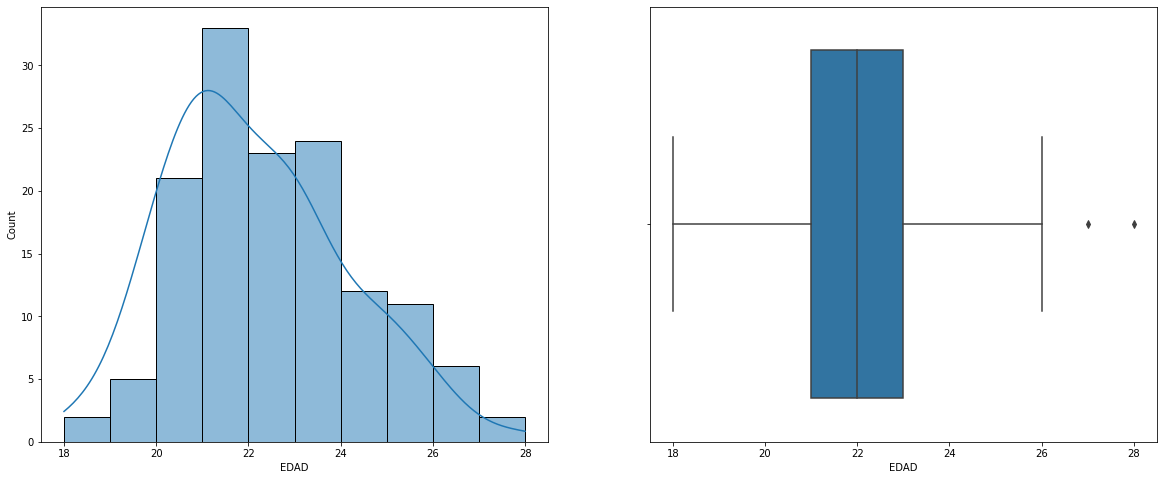

In [19]:
fig, axes = plt.subplots(1,2, figsize = (20,8))

sb.histplot(data=acra, x = 'EDAD', kde=True, binwidth=1,ax = axes[0])
#sb.countplot(data=acra, x = 'EDAD',color='c', ax = axes[1])
sb.boxplot(data=acra, x = 'EDAD', ax = axes[1],hue='SEXO')


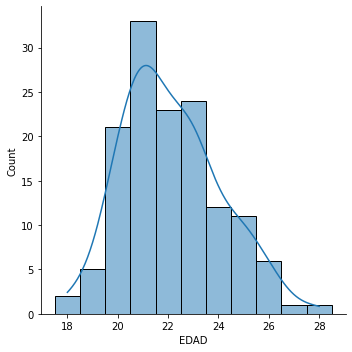

In [31]:
ax=sb.displot(data=acra, x="EDAD", discrete=True,kde=True)


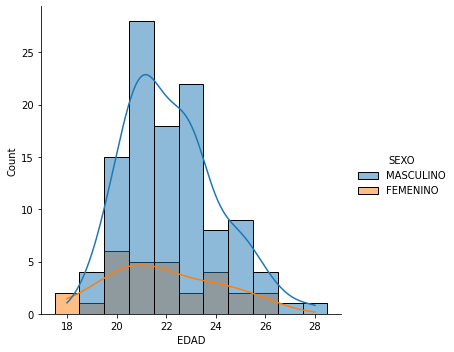

In [21]:
sb.displot(data=acra, x="EDAD",hue="SEXO", discrete=True,kde=True)

#Género del encuestado

In [22]:
acra['SEXO'].value_counts()

MASCULINO    110
FEMENINO      29
Name: SEXO, dtype: int64

In [23]:
acra.groupby('SEXO')['EDAD'].mean()

SEXO
FEMENINO     21.862069
MASCULINO    22.200000
Name: EDAD, dtype: float64

###Ejemplo de visualización

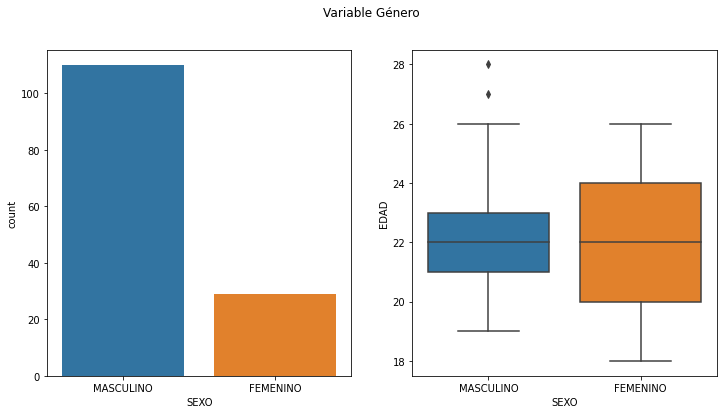

In [24]:
fig, axes = plt.subplots(1,2,figsize = (12,6))

fig.suptitle('Variable Género')
sb.countplot(ax = axes[0], data = acra, x = 'SEXO')
sb.boxplot(ax = axes[1], data = acra, x = 'SEXO', y = 'EDAD')

#Distrito de residencia

In [32]:
acra['DISTRITO_VIVE'].unique()

array(['SAN JUAN DE LURIGANCHO', 'SANTA ANITA', 'CHORRILLOS',
       'PUEBLO LIBRE', 'CARABAYLLO', 'LA VICTORIA', 'SAN IGNACIO',
       'PUENTE PIEDRA', 'COMAS', 'ANCON', 'SANTA ROSA', 'CUTERVO',
       'SAN MARTÍN DE PORRES', 'VMT', 'ATE', 'HUARAL',
       'SAN MARTIN DE PORRES ', 'LOS OLIVOS', 'SANTIAGO DE SURCO',
       'CARMEN DE LA LEGUA', 'SAN JUAN DE MIRAFLORES',
       'VILLA MARÍA DEL TRIUNFO', 'INDEPENDENCIA', 'CALLAO', 'CESAR OMAR',
       'SAN MARTIN DE PORRES', 'CARMEN DE LA LEGUA - CALLAO',
       'EL AGUSTINO', 'VILLA EL SALVADOR', 'LURIN', 'CARHUAZ',
       'CARMEN DE LA LEGUA REYNOSO', 'JESÚS MARÍA', 'HUARAL ',
       'SAN MIGUEL', 'ACOMBAMBA', 'CARABAYLLO ', 'CERCADO DE LIMA',
       'LINCE', 'SAN BORJA', 'SAN MARTIN PORRES', 'CHANCAY', 'VENTANILLA',
       'LURIGANCHO', 'SAN JUAN DE LURIGANCHO ', 'SAN LUIS', 'PROVINCIA',
       'RIMAC', 'CERCADO', 'CHACLACAYO'], dtype=object)

In [ ]:
n_distrito=acra['DISTRITO_VIVE'].value_counts()
type(n_distrito)
n_distrito= pd.DataFrame(n_distrito)

n_distrito

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.style.use("bmh") 
plt.barh(n_distrito,n_distrito.index )            
# Crear gráfico
plt.show()      

Text(0, 0.5, 'Distrito de residencia')

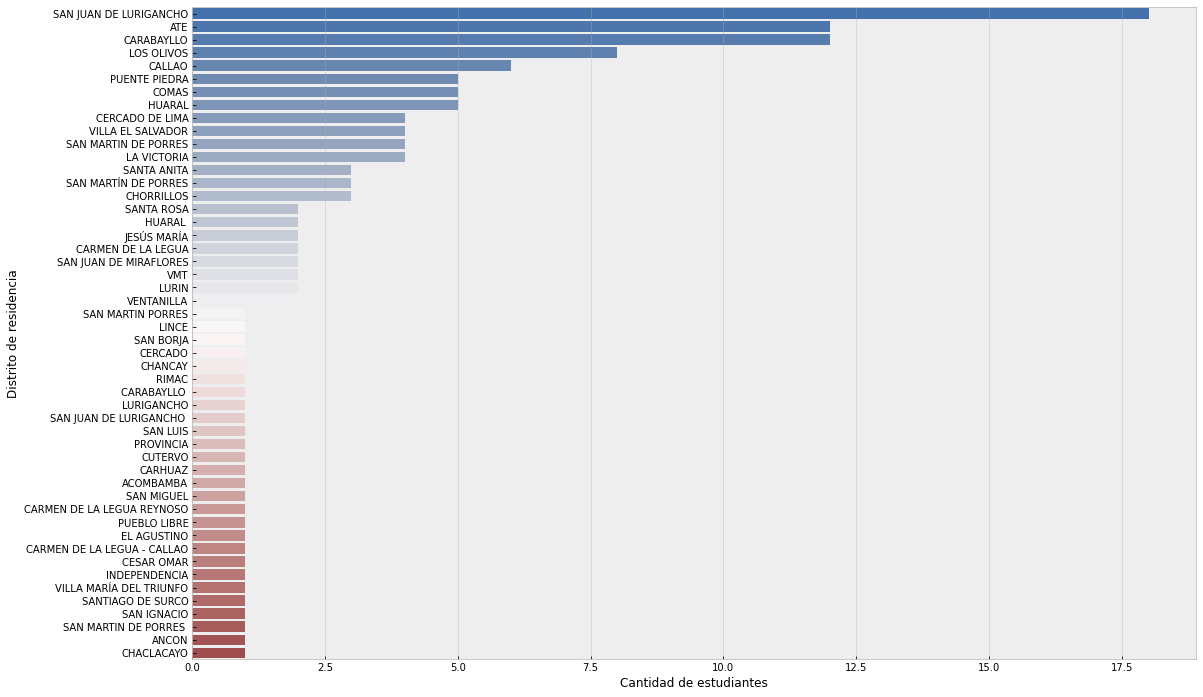

In [38]:
fig = plt.figure(figsize=(18,12))
sb.countplot(data = acra, y = 'DISTRITO_VIVE',order= acra['DISTRITO_VIVE'].value_counts().index,palette="vlag")

plt.xlabel('Cantidad de estudiantes')
plt.ylabel('Distrito de residencia')

#Condición del estudiante

In [41]:
acra['CONDICION_ESTUDIANTE'].value_counts()

SOLO ESTUDIA          88
TRABAJA Y ESTUDIA     46
ESTUDIA Y PRACTICA     5
Name: CONDICION_ESTUDIANTE, dtype: int64

In [42]:
acra.groupby('CONDICION_ESTUDIANTE')['SEXO'].value_counts()

CONDICION_ESTUDIANTE  SEXO     
ESTUDIA Y PRACTICA    MASCULINO     3
                      FEMENINO      2
SOLO ESTUDIA          MASCULINO    68
                      FEMENINO     20
TRABAJA Y ESTUDIA     MASCULINO    39
                      FEMENINO      7
Name: SEXO, dtype: int64

###Ejemplo de visualización

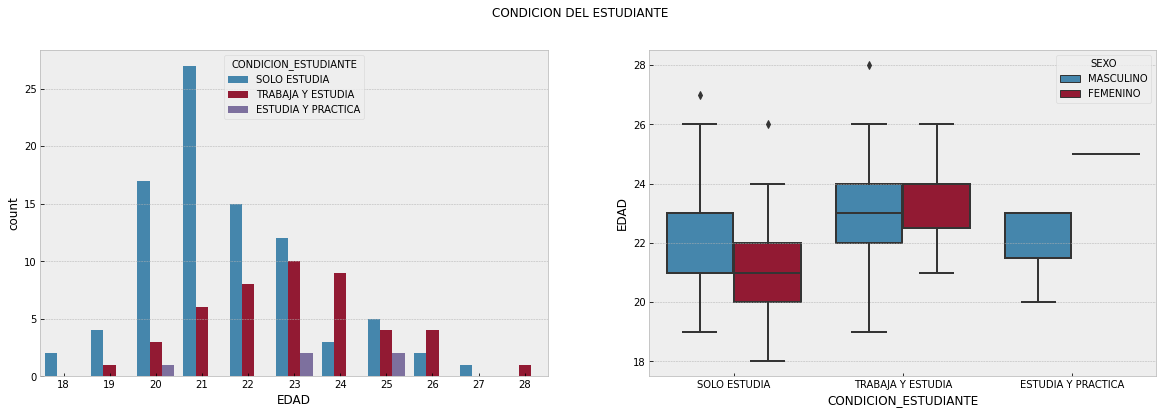

In [45]:
fig, axes = plt.subplots(1,2,figsize = (20,6))

fig.suptitle('CONDICION DEL ESTUDIANTE')
#sb.countplot(ax = axes[0], data = acra, x = 'CONDICION_ESTUDIANTE',hue='EDAD')
sb.countplot(ax = axes[0], data = acra, x = 'EDAD',hue='CONDICION_ESTUDIANTE')
sb.boxplot(ax = axes[1], data = acra, x = 'CONDICION_ESTUDIANTE', y = 'EDAD', hue='SEXO')

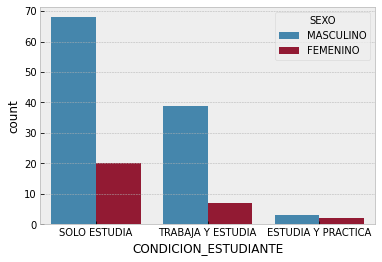

In [44]:
sb.countplot( data = acra, x = 'CONDICION_ESTUDIANTE',hue='SEXO')

# **Preparación: Transformación y limpieza**

---

In [83]:
#Datos de información del estudiante
info=acra[['CONDICION_ESTUDIANTE','EDAD','DISTRITO_VIVE','SEXO']]
info.head()

,CONDICION_ESTUDIANTE,EDAD,DISTRITO_VIVE,SEXO
ID_RES_ACRA,,,,
1,SOLO ESTUDIA,23,SAN JUAN DE LURIGANCHO,MASCULINO
2,SOLO ESTUDIA,24,SANTA ANITA,FEMENINO
3,SOLO ESTUDIA,26,CHORRILLOS,MASCULINO
4,SOLO ESTUDIA,22,PUEBLO LIBRE,MASCULINO
5,SOLO ESTUDIA,22,CARABAYLLO,MASCULINO


In [69]:
#ESTRATEGIA DE ADQUISICION E INFORMACION (EADQ)
EADQ=acra[['PG_ACRA_1','PG_ACRA_2','PG_ACRA_3','PG_ACRA_4','PG_ACRA_5','PG_ACRA_6','PG_ACRA_7','PG_ACRA_8','PG_ACRA_9','PG_ACRA_10','PG_ACRA_11']]
EADQ.head()
#type(EADQ)

,PG_ACRA_1,PG_ACRA_2,PG_ACRA_3,PG_ACRA_4,PG_ACRA_5,PG_ACRA_6,PG_ACRA_7,PG_ACRA_8,PG_ACRA_9,PG_ACRA_10,PG_ACRA_11
ID_RES_ACRA,,,,,,,,,,,
1,d) Siempre o casi siempre,b) Algunas veces,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,d) Siempre o casi siempre,b) Algunas veces,b) Algunas veces
2,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces,c) Bastantes,c) Bastantes,b) Algunas veces,b) Algunas veces
3,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,b) Algunas veces,c) Bastantes,b) Algunas veces,b) Algunas veces
4,a) Nunca o casi nunca,a) Nunca o casi nunca,b) Algunas veces,a) Nunca o casi nunca,a) Nunca o casi nunca,b) Algunas veces,a) Nunca o casi nunca,a) Nunca o casi nunca,b) Algunas veces,a) Nunca o casi nunca,a) Nunca o casi nunca
5,c) Bastantes,b) Algunas veces,b) Algunas veces,b) Algunas veces,a) Nunca o casi nunca,b) Algunas veces,b) Algunas veces,b) Algunas veces,a) Nunca o casi nunca,b) Algunas veces,a) Nunca o casi nunca


In [70]:
cambio_EADQ= EADQ.replace({"a) Nunca o casi nunca":1, "b) Algunas veces":2, "c) Bastantes":3,"d) Siempre o casi siempre":4})
cambio_EADQ


,PG_ACRA_1,PG_ACRA_2,PG_ACRA_3,PG_ACRA_4,PG_ACRA_5,PG_ACRA_6,PG_ACRA_7,PG_ACRA_8,PG_ACRA_9,PG_ACRA_10,PG_ACRA_11
ID_RES_ACRA,,,,,,,,,,,
1,4,2,4,4,4,4,4,4,4,2,2
2,2,3,2,2,3,2,2,3,3,2,2
3,2,2,2,2,2,2,2,2,3,2,2
4,1,1,2,1,1,2,1,1,2,1,1
5,3,2,2,2,1,2,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
135,4,4,3,3,3,3,2,2,4,3,3
136,2,2,2,1,2,1,2,3,2,3,1
137,2,2,2,2,2,2,2,2,2,2,2


In [71]:
#Se crea la nueva variebñe puntaje EADQ
cambio_EADQ['puntaje_EADQ']= cambio_EADQ.sum(axis=1)
cambio_EADQ

,PG_ACRA_1,PG_ACRA_2,PG_ACRA_3,PG_ACRA_4,PG_ACRA_5,PG_ACRA_6,PG_ACRA_7,PG_ACRA_8,PG_ACRA_9,PG_ACRA_10,PG_ACRA_11,puntaje_EADQ
ID_RES_ACRA,,,,,,,,,,,,
1,4,2,4,4,4,4,4,4,4,2,2,38
2,2,3,2,2,3,2,2,3,3,2,2,26
3,2,2,2,2,2,2,2,2,3,2,2,23
4,1,1,2,1,1,2,1,1,2,1,1,14
5,3,2,2,2,1,2,2,2,1,2,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
135,4,4,3,3,3,3,2,2,4,3,3,34
136,2,2,2,1,2,1,2,3,2,3,1,21
137,2,2,2,2,2,2,2,2,2,2,2,22


In [73]:
cambio_EADQ['puntaje_EADQ'].describe()

count    139.000000
mean      27.223022
std        5.244795
min       14.000000
25%       23.000000
50%       26.000000
75%       31.000000
max       40.000000
Name: puntaje_EADQ, dtype: float64

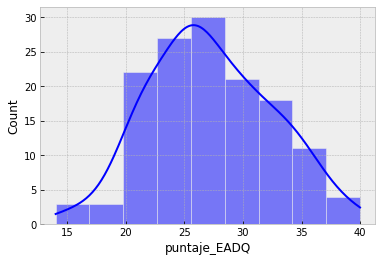

In [76]:
sb.histplot(data=cambio_EADQ, x = 'puntaje_EADQ', kde=True)

In [109]:
puntaje_eadq=cambio_EADQ['puntaje_EADQ'].value_counts()
print("Puntaje Cantidad")
print(puntaje_eadq)

Puntaje Cantidad
26    15
25    14
30    10
21     9
32     8
23     8
29     8
22     8
28     8
27     7
35     6
33     6
24     5
20     5
34     4
36     4
31     3
18     2
38     2
16     2
19     1
39     1
14     1
40     1
37     1
Name: puntaje_EADQ, dtype: int64


In [113]:
#Une los dataframe info y cambio_EADQ
EADQ = pd.concat([info, cambio_EADQ], axis=1)
EADQ

,CONDICION_ESTUDIANTE,EDAD,DISTRITO_VIVE,SEXO,PG_ACRA_1,PG_ACRA_2,PG_ACRA_3,PG_ACRA_4,PG_ACRA_5,PG_ACRA_6,PG_ACRA_7,PG_ACRA_8,PG_ACRA_9,PG_ACRA_10,PG_ACRA_11,puntaje_EADQ,desarrollo
ID_RES_ACRA,,,,,,,,,,,,,,,,,
1,SOLO ESTUDIA,23,SAN JUAN DE LURIGANCHO,MASCULINO,4,2,4,4,4,4,4,4,4,2,2,38,2
2,SOLO ESTUDIA,24,SANTA ANITA,FEMENINO,2,3,2,2,3,2,2,3,3,2,2,26,1
3,SOLO ESTUDIA,26,CHORRILLOS,MASCULINO,2,2,2,2,2,2,2,2,3,2,2,23,1
4,SOLO ESTUDIA,22,PUEBLO LIBRE,MASCULINO,1,1,2,1,1,2,1,1,2,1,1,14,0
5,SOLO ESTUDIA,22,CARABAYLLO,MASCULINO,3,2,2,2,1,2,2,2,1,2,1,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,TRABAJA Y ESTUDIA,22,CALLAO,MASCULINO,4,4,3,3,3,3,2,2,4,3,3,34,2
136,SOLO ESTUDIA,22,SAN JUAN DE LURIGANCHO,MASCULINO,2,2,2,1,2,1,2,3,2,3,1,21,0
137,SOLO ESTUDIA,18,CARABAYLLO,FEMENINO,2,2,2,2,2,2,2,2,2,2,2,22,0


Valores Faltantes(Ninguno)

In [101]:
EADQ.isnull().sum()

CONDICION_ESTUDIANTE    0
EDAD                    0
DISTRITO_VIVE           0
SEXO                    0
PG_ACRA_1               0
PG_ACRA_2               0
PG_ACRA_3               0
PG_ACRA_4               0
PG_ACRA_5               0
PG_ACRA_6               0
PG_ACRA_7               0
PG_ACRA_8               0
PG_ACRA_9               0
PG_ACRA_10              0
PG_ACRA_11              0
puntaje_EADQ            0
dtype: int64

Inspección visual de la nueva variable puntaje_EADQ


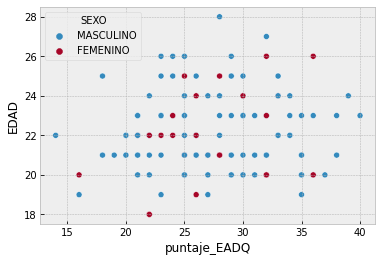

In [87]:
sb.scatterplot(data = EADQ, x = 'puntaje_EADQ',y='EDAD',hue="SEXO")


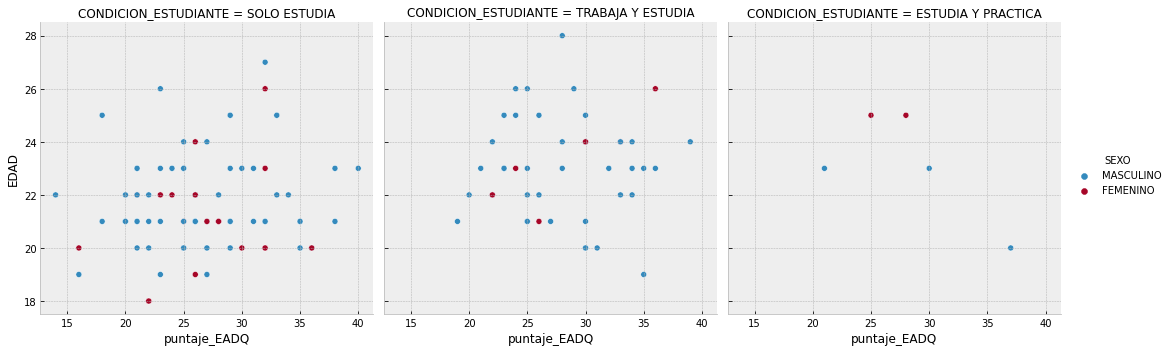

In [106]:
sb.relplot(data=EADQ, x="puntaje_EADQ", y="EDAD",hue="SEXO",col="CONDICION_ESTUDIANTE")


In [107]:
cambio_EADQ

,PG_ACRA_1,PG_ACRA_2,PG_ACRA_3,PG_ACRA_4,PG_ACRA_5,PG_ACRA_6,PG_ACRA_7,PG_ACRA_8,PG_ACRA_9,PG_ACRA_10,PG_ACRA_11,puntaje_EADQ
ID_RES_ACRA,,,,,,,,,,,,
1,4,2,4,4,4,4,4,4,4,2,2,38
2,2,3,2,2,3,2,2,3,3,2,2,26
3,2,2,2,2,2,2,2,2,3,2,2,23
4,1,1,2,1,1,2,1,1,2,1,1,14
5,3,2,2,2,1,2,2,2,1,2,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
135,4,4,3,3,3,3,2,2,4,3,3,34
136,2,2,2,1,2,1,2,3,2,3,1,21
137,2,2,2,2,2,2,2,2,2,2,2,22


In [110]:
def desarrollo(puntaje_EADQ):
  if(puntaje_EADQ>=14 and puntaje_EADQ<23):
    desarrollo=0
    return desarrollo
  elif (puntaje_EADQ>=23 and puntaje_EADQ<32):
    desarrollo=1
    return desarrollo
  else:
    desarrollo=2
    return desarrollo
cambio_EADQ["desarrollo"]=cambio_EADQ["puntaje_EADQ"].apply(desarrollo)

In [122]:
cambio_EADQ

,PG_ACRA_1,PG_ACRA_2,PG_ACRA_3,PG_ACRA_4,PG_ACRA_5,PG_ACRA_6,PG_ACRA_7,PG_ACRA_8,PG_ACRA_9,PG_ACRA_10,PG_ACRA_11,puntaje_EADQ,desarrollo
ID_RES_ACRA,,,,,,,,,,,,,
1,4,2,4,4,4,4,4,4,4,2,2,38,2
2,2,3,2,2,3,2,2,3,3,2,2,26,1
3,2,2,2,2,2,2,2,2,3,2,2,23,1
4,1,1,2,1,1,2,1,1,2,1,1,14,0
5,3,2,2,2,1,2,2,2,1,2,1,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,4,4,3,3,3,3,2,2,4,3,3,34,2
136,2,2,2,1,2,1,2,3,2,3,1,21,0
137,2,2,2,2,2,2,2,2,2,2,2,22,0


Dividir las variables


In [152]:
caracteristica = cambio_EADQ.drop(["desarrollo"], axis=1)
x = np.array(caracteristica)
y = np.array(cambio_EADQ["desarrollo"])


#Variables y data a utilizar
División de los Datos

In [171]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=0, test_size=0.2)

#Modelamiento


In [172]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

###Modelo del árboles de decisión

```
# Esto tiene formato de código
```



In [178]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
tree.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = tree.predict(x_val)

Modelo de evaluación




>Estimemos con qué precisión el clasificador o modelo puede predecir el tipo de cultivares.

La precisión se puede calcular comparando los valores reales del conjunto de pruebas y los valores predichos.





In [179]:
# Model Accuracy, how often is the classifier correct?
print("Exactitud:",metrics.accuracy_score(y_val, y_pred))

Exactitud: 1.0


 tasa de clasificación del 100%, considerada como una buena precisión.

In [175]:
tree.tree_.max_depth

2

In [167]:
!pip install graphviz

In [168]:
import graphviz 
from sklearn.tree import export_graphviz

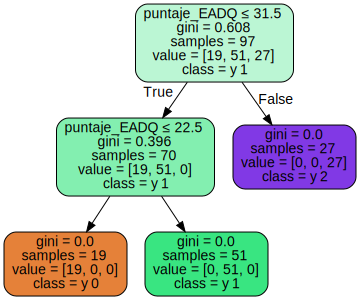

In [170]:
caracteristica_names = caracteristica.columns

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=caracteristica_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

graph

Eactitud del modelo

In [176]:
validation_prediction = tree.predict(x_val)
training_prediction = tree.predict(x_train)

In [177]:
print('Exactitud training data: ', metrics.accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', metrics.accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  1.0
Exactitud validation data:  1.0


###Bosques Aleatorios

In [187]:
caracteristica = cambio_EADQ.drop(["desarrollo"], axis=1)
x = np.array(caracteristica)
y = np.array(cambio_EADQ["desarrollo"])
#División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [ ]:
cambio_EADQ

In [189]:
#n_estimators: numero de arboles en el bosque
from sklearn.ensemble import RandomForestClassifier
BA_model = RandomForestClassifier(n_estimators = 50, 
                                  min_samples_leaf = 1,criterion = 'entropy')

In [190]:
BA_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [192]:
y_pred=BA_model.predict(X_test)

In [191]:
#Random Forest para TEST ACRA
BA_model.score(X_test, y_test)

1.0

In [193]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Exactitud: 1.0




---



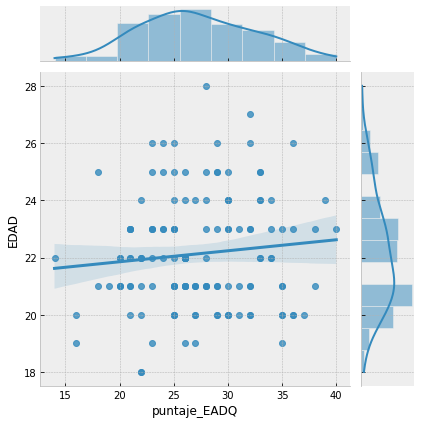

In [97]:
#sns.relplot(data=tips, x="total_bill", y="EDAD", hue="SEXO", col="CONDICION_ESTUDIANTE", col_wrap=2)
sb.jointplot(x='puntaje_EADQ', y='EDAD', data=EADQ, kind='reg')

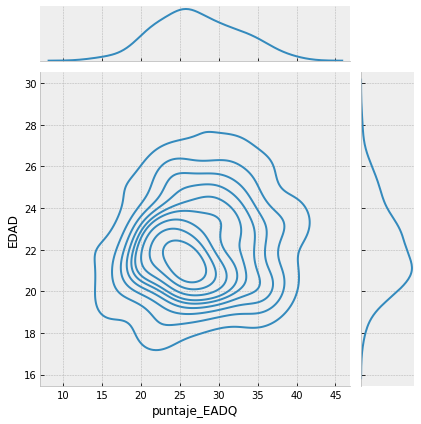

In [100]:
sb.jointplot(x='puntaje_EADQ', y='EDAD', data=EADQ, kind='kde')

#EVALUACIÖN

In [204]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluacion_modelo(y_test,y_pred):
  print("Matriz de confusión")
  print(confusion_matrix(y_test, y_pred))
  print("")

  print("Reporte de clasificación")
  print(classification_report(y_test, y_pred))

In [205]:
caracteristica = cambio_EADQ.drop(["desarrollo"], axis=1)
x = np.array(caracteristica)
y = np.array(cambio_EADQ["desarrollo"])


In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [210]:
#Algoritmo 1
print("Arbol de decision(profundidad=3")
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
tree = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
tree.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = tree.predict(x_test)

evaluacion_modelo(y_test,y_pred)

print('Precision del modelo '+ str(round(precision_score(y_test, y_pred, average='micro'),5)))
print("Precision por dato")
precision_score(y_test, y_pred, average =None)

Arbol de decision(profundidad=3
Matriz de confusión
[[ 6  0  0]
 [ 0 19  0]
 [ 0  0  3]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         3

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

Precision del modelo 1.0
Precision por dato


array([1., 1., 1.])

In [212]:
#Algoritmo 2
print("Bosques Aleatorios")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Bosques Aleatorios
Exactitud: 1.0
